In [1]:
import os
# SQL LOGIN
host = os.getenv('sqlHOST')
user = os.getenv('sqlUSER')
password = os.getenv('sqlPSWD')


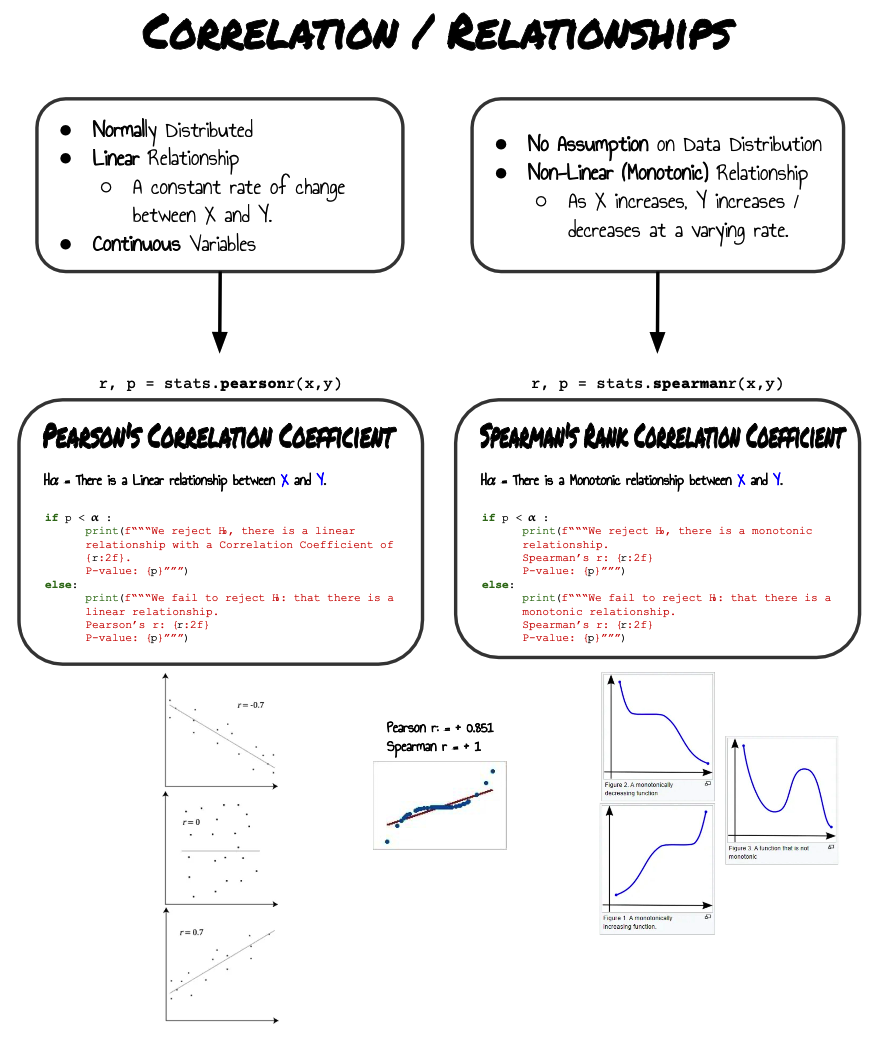

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#import env
import os

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-danger" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Be sure to import .gitignore prior to pushing env.py</strong>
</div>

In [26]:
def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [3]:
telco_url= get_db_url('telco_churn')

In [48]:
emp_url = get_db_url('employees')

# 1. Answer with the type of stats test you would use (assume normal distribution):

## 1.1 Is there a relationship between the length of your arm and the length of your foot?

- Variable 1: length of arm (continuous)
- Variable 2: length of foot (continuous)
- Use: Pearson's r or Spearman's

## 1.2 Do guys and gals quit their jobs at the same rate?

- Variable 1: Guys/Girls
- Variable 2: Quit Rate
- Independent T-Test: 2 tailed

## 1.3 Does the length of time of the lecture correlate with a students grade?

- Variable 1: length of lecture (continuous)
- Variable 2: student's grade (continuous)
- Use: Pearson's R or Spearman's

# 2. Use the `telco_churn` data.

In [2]:
def get_db_url(username, password, host,db):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'    

In [ ]:
url= get_db_url(env.username, env.password, env.host, db='telco_churn')

In [3]:
url= get_db_url(os.getenv('sqlUSER'), os.getenv('sqlPSWD'), os.getenv('sqlHOST'), db='telco_churn')

In [4]:
query = 'SELECT * FROM customers'

In [5]:
df = pd.read_sql(query, url)

<div class="alert alert-block alert-info">
<b>Hint:</b> 
<br>
    
Another way to read in telco data is to save it to a csv and bring it in.
<br>
df = pd.read_csv('telco_normalized.csv')
    </div>

In [6]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

## 2.1 Does tenure correlate with monthly charges?

<div class="alert alert-block alert-success">
<b>Step-by-Step:</b>

1. State our hypothesis, set alpha value
        <br>
2. Select the data, run .info
        <br>
3. Plot the data
        <br>
4. Test for assumputions: Is there normality?
        <br>
5. Run stats test
        <br>
6. Draw Conclusions 
</div>

<b>1: State Hypothesis & Set $\alpha$</b>
- $H_0$: There is no correlation between tenure and monthly charges
- $H_a$: There is a correlation between tenure and monthly charges

In [8]:
# set α
α = 0.05

<b>2: Select data and run `.info`</b>

In [9]:
charges_df = df[['monthly_charges', 'tenure']]

In [10]:
charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<b>3: Plot data</b>

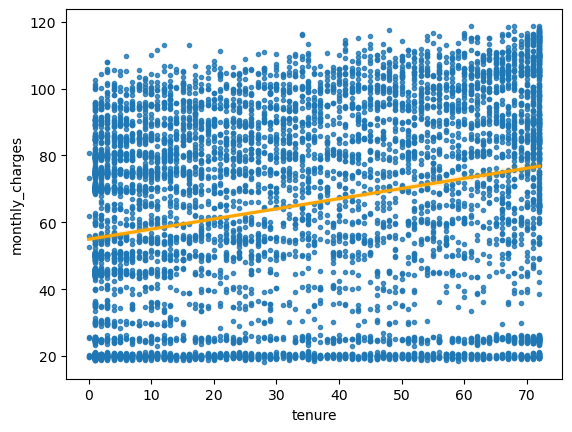

In [11]:
sns.regplot(x='tenure', y = 'monthly_charges', data=charges_df, marker='.', line_kws={'color': 'orange'})
plt.show()

<div class="alert alert-block alert-info">
<b>Hint:</b> 
if there is variable that corresponds with time- put that on the "x-axis"
</div>

<b>4: Test for Assumptions (distributions)</b>

<AxesSubplot:>

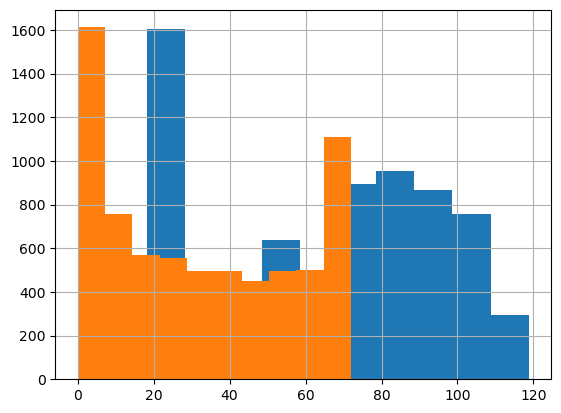

In [12]:
charges_df.monthly_charges.hist()
charges_df.tenure.hist()

In [13]:
def eval_dist(r, p, α=0.05):
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [14]:
r,p = stats.shapiro(df.monthly_charges)
r,p

(0.9208889007568359, 0.0)

In [15]:
eval_dist(r,p)

The data is NOT normally distributed


In [16]:
r,p = stats.shapiro(df.tenure)
r,p

(0.9037512540817261, 0.0)

In [17]:
eval_dist(r,p)

The data is NOT normally distributed


<b>5: Run `stats` Tests</b>

In [17]:
# Since it's not normally distributed, use Spearman
r,p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)
r,p

(0.27641678933130215, 1.0271266876409408e-123)

<b>6: Draw Conclusions</b>

In [19]:
def eval_Presult(r, p, α=0.05):
    if p < α:
        return print(f"""We reject H₀, there is a linear relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there is a linear relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

In [20]:
def eval_Sresult(r, p, α=0.05):
    if p < α:
        return print(f"""We reject H₀, there is a monotonic relationship.
Spearman’s rs: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there is a monotonic relationship.
Spearman’s rs: {r:2f}
P-value: {p}""")

In [21]:
eval_Sresult(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.276417
P-value: 1.0271266876409408e-123


<b>Takeaways:</b>
<br>
There is a correlation between monthly charges and tenure.
<br>
With an r of .28, the correlation is weak-moderate.

## 2.2 Total charges?

<b>1: State Hypothesis & Set $\alpha$</b>
- $H_0$: There is no correlation between tenure and total charges
- $H_a$: There is a correlation between tenure and total charges

In [22]:
# set α
α = 0.05

<b>2: Select data and run `.info`</b>

In [27]:
ttl_charges_df = df[['total_charges', 'tenure']]

In [28]:
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   total_charges  7043 non-null   object
 1   tenure         7043 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


<div class="alert alert-block alert-info">
<b>Hint:</b> 
use '.sort_values()'' to see if you have any "weird" values that need to be converted.
    <br>
    (ex) ttl_charges_df.total_charges.sort_values()
</div>

In [29]:
ttl_charges_df.total_charges.sort_values()

2855          
3118          
3052          
5433          
1731          
         ...  
5868    997.75
4298     998.1
4173    999.45
3162     999.8
6421     999.9
Name: total_charges, Length: 7043, dtype: object

In [30]:
#covert empty space into '0'
ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

In [31]:
#confirm data types were changed
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_charges  7043 non-null   float64
 1   tenure         7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<b>3: Plot data</b>

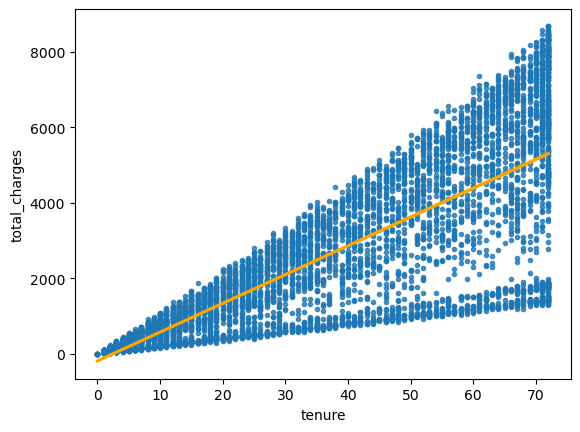

In [32]:
sns.regplot(x='tenure', y = 'total_charges', data=ttl_charges_df, marker='.', line_kws={'color': 'orange'})
plt.show()

<b>4: Test for Assumptions (distributions)</b>

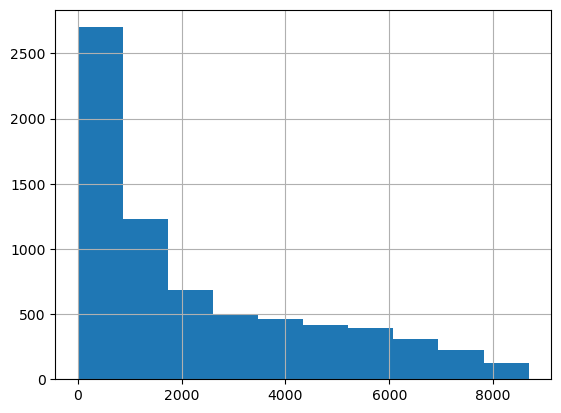

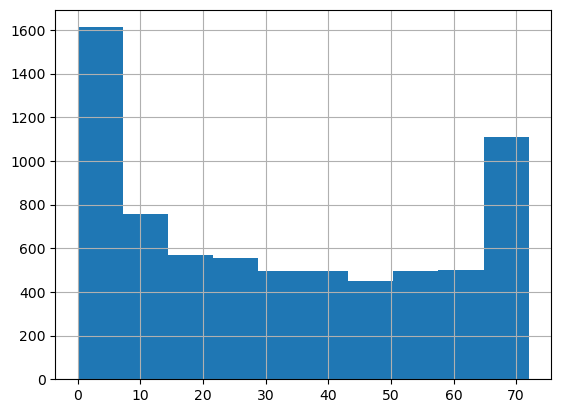

In [36]:
ttl_charges_df.total_charges.hist()
plt.show()

ttl_charges_df.tenure.hist()
plt.show()

In [135]:
r,p = stats.shapiro(ttl_chargesdf.total_charges)
r,p

(0.9697386622428894, 0.0)

In [136]:
eval_dist(r,p)

The data is normally distributed


In [135]:
r,p = stats.shapiro(ttl_chargesdf.tenure)
r,p

(0.9697386622428894, 0.0)

In [136]:
eval_dist(r,p)

The data is normally distributed


<b>5: Run `stats` Tests</b>

In [37]:
# Since it's not normally distributed, use Spearman
r,p = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)
r,p

(0.8896957900597577, 0.0)

<b>6: Draw Conclusions</b>

In [39]:
eval_Sresult(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.889696
P-value: 0.0


<b>Takeaway</b>: 
<br>
There is a correlation between tenure and total charges
<br>
With an r of .89, the correlation is strong.

## 2.3 What happens if you control for phone and internet service?

<b>1: State Hypothesis & Set $\alpha$</b>

Of customers who have only phone service:
- $H_0$: There is no correlation between tenure and monthly charges
- $H_a$: There is a correlation between tenure and monthly charges

In [40]:
# set α
α = 0.05

<b>2: Select data and run `.info`</b>

In [41]:
phone_df = df[(df.phone_service == "Yes") & (df.internet_service_type_id == 1)][['monthly_charges', 'tenure']]

In [42]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1739 non-null   float64
 1   tenure           1739 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


<b>3: Plot data</b>

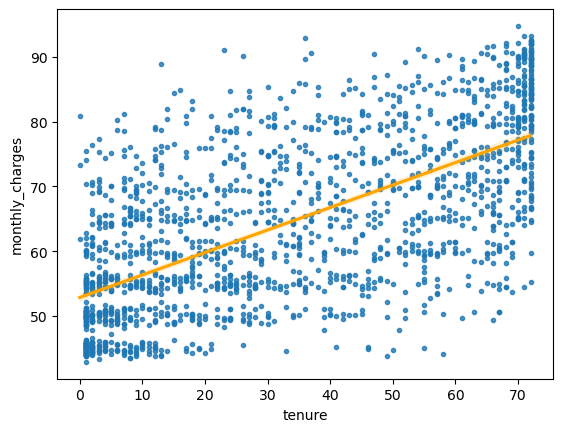

In [43]:
sns.regplot(x='tenure', y = 'monthly_charges', data=phone_df, marker='.', line_kws={'color': 'orange'})
plt.show()

<b>4: Test for Assumptions (distributions)</b>

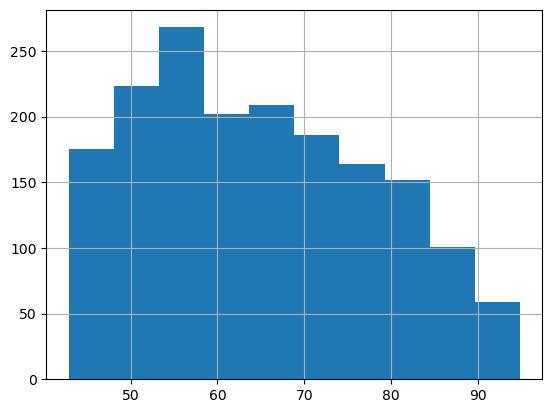

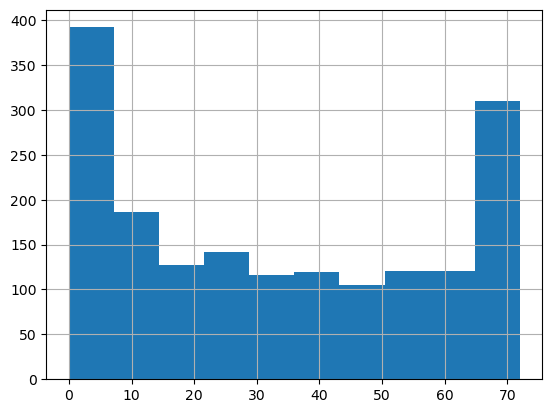

In [44]:
phone_df.monthly_charges.hist()
plt.show()

phone_df.tenure.hist()
plt.show()

In [135]:
r,p = stats.shapiro(phone_df.monthly_charges)
r,p

(0.9697386622428894, 0.0)

In [136]:
eval_dist(r,p)

The data is normally distributed


In [135]:
r,p = stats.shapiro(phone_df.tenure)
r,p

(0.9697386622428894, 0.0)

In [136]:
eval_dist(r,p)

The data is normally distributed


<b>5: Run `stats` Tests</b>

In [45]:
# Since it's not normally distributed, use Spearman
r,p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
r,p

(0.6644708508462759, 5.423601644635052e-222)

<b>6: Draw Conclusions</b>

In [46]:
eval_Sresult(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.664471
P-value: 5.423601644635052e-222


<b>Takeaways</b>:
<br>
There is a moderate-strong correaltion between tenure and monthly charges for customers who have only phone service.

# 3. Use the `employees` database.

In [ ]:
url_emp= get_db_url(env.username, env.password, env.host, db='employees')

In [100]:
url_emp= get_db_url(os.getenv('sqlUSER'), os.getenv('sqlPSWD'), os.getenv('sqlHOST'), db='employees')

In [49]:
#set sql query
query = '''
SELECT * 
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01';
        '''

In [115]:
#set sql query
query = '''
select * from (
    select 
        e.emp_no
        ,salary
        ,e.hire_date
        ,case when s.to_date = '9999-01-01' 
            then (select MAX(to_date) from salaries where to_date != '9999-01-01')
            else s.to_date
            end as to_date
        ,row_number() over(partition by e.emp_no, e.hire_date order by s.to_date DESC) rn
    from employees e
    join salaries s on s.emp_no = e.emp_no
 ) a where rn = 1;
        '''

In [116]:
#read in sql query
df = pd.read_sql(query, url_emp)

In [117]:
df.head()

,emp_no,salary,hire_date,to_date,rn
0,10001,88958,1986-06-26,2002-08-01,1
1,10002,72527,1985-11-21,2002-08-01,1
2,10003,43311,1986-08-28,2002-08-01,1
3,10004,74057,1986-12-01,2002-08-01,1
4,10005,94692,1989-09-12,2002-08-01,1


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300024 non-null  int64 
 1   salary     300024 non-null  int64 
 2   hire_date  300024 non-null  object
 3   to_date    300024 non-null  object
 4   rn         300024 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.4+ MB


## 3.1 Is there a relationship between how long an employee has been with the company and their salary?

<b>1: State Hypothesis & Set $\alpha$</b>
- $H_0$: There is no correlation between tenure and salary
- $H_a$: There is a correlation between tenure and salary

In [104]:
# set α
α = 0.05

<b>2: Select data and run `.info`</b>

In [119]:
#subtract dates to get tenure
(df.to_date - df.hire_date)

0        5880 days
1        6097 days
2        5817 days
3        5722 days
4        4706 days
            ...   
300019   3488 days
300020   4326 days
300021   5946 days
300022   3214 days
300023   1705 days
Length: 300024, dtype: timedelta64[ns]

In [120]:
#subtract dates to get tenure
(df.to_date - df.hire_date).astype(str).str.split(' ', expand=True)

,0,1
0,5880,days
1,6097,days
2,5817,days
3,5722,days
4,4706,days
...,...,...
300019,3488,days
300020,4326,days
300021,5946,days
300022,3214,days


In [121]:
#reformat tenure to int so it's useable
df['tenure'] = (df.to_date - df.hire_date).astype(str).str.split(' ', expand=True)[0]

In [122]:
df.tenure = df.tenure.astype(int)

In [123]:
#create the dataframe with the info we want
tenure_df = df[['tenure', 'salary']]

In [124]:
tenure_df.head()

,tenure,salary
0,5880,88958
1,6097,72527
2,5817,43311
3,5722,74057
4,4706,94692


<b>3: Plot data</b>

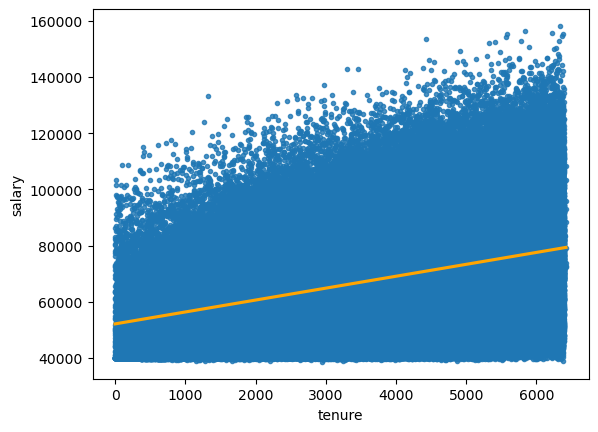

In [125]:
sns.regplot(x='tenure', y = 'salary', data=tenure_df, marker='.', line_kws={'color': 'orange'})
plt.show()

<b>4: Test for Assumptions (distributions)</b>

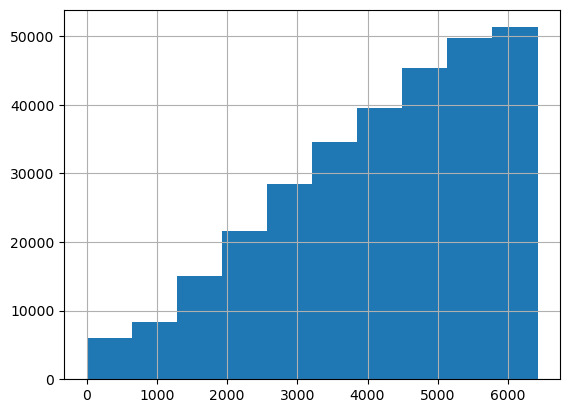

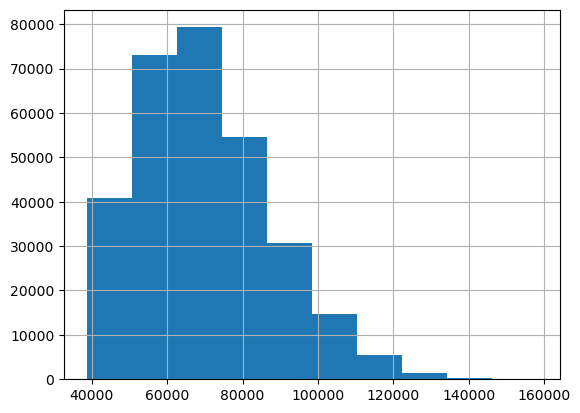

In [126]:
tenure_df.tenure.hist()
plt.show()

tenure_df.salary.hist()
plt.show()

In [130]:
from scipy.stats import shapiro 

In [139]:
r,p = stats.shapiro(df.tenure)
r,p

(0.950564444065094, 0.0)

In [137]:
def eval_dist(r, p, α=0.05):
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [140]:
eval_dist(r,p)

The data is NOT normally distributed


In [141]:
r,p = stats.shapiro(df.salary)
r,p

(0.9697386622428894, 0.0)

In [142]:
eval_dist(r,p)

The data is NOT normally distributed


<b>5: Run `stats` Tests</b>

In [127]:
# Since it's not normally distributed, use Spearman
r,p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)
r,p

(0.3752474702658628, 0.0)

In [156]:
from scipy.stats import kstest

In [157]:
kstest(df.tenure, 'norm')

AttributeError: 'DataFrame' object has no attribute 'tenure'

<b>6: Draw Conclusions</b>

In [128]:
eval_Sresult(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.375247
P-value: 0.0


<b>Takeaways</b>:
<br>
We reject the null hypothesis. There is a moderate correlation between tenure and salary.  

## 3.2 Is there a relationship between how long an employee has been with the company and the number of titles they have had?

<b>1: State Hypothesis & Set $\alpha$</b>
- $H_0$: There is no correlation between tenure and number of titles
- $H_a$: There is a correlation between tenure and number of titles

In [129]:
# set α
α = 0.05

<b>2: Select data and run `.info`</b>

In [70]:
#set sql query
query = '''
select 
    t.emp_no, 
    count(t.title) AS num_titles, 
    te.tenure
from titles t
join (select 
        emp_no, 
        datediff(now(), min(from_date)) AS tenure 
      from titles
      group by emp_no
      having max(to_date) = '9999-01-01') te 
on t.emp_no = te.emp_no
group by t.emp_no;        
'''

In [71]:
#read in sql query
df = pd.read_sql(query, url_emp)

In [72]:
df.head()

,emp_no,num_titles,tenure
0,10001,1,13438
1,10002,1,9747
2,10003,1,9991
3,10004,2,13280
4,10005,2,12264


In [75]:
df = df[['num_titles', 'tenure']]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   num_titles  240124 non-null  int64
 1   tenure      240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


<b>3: Plot data</b>

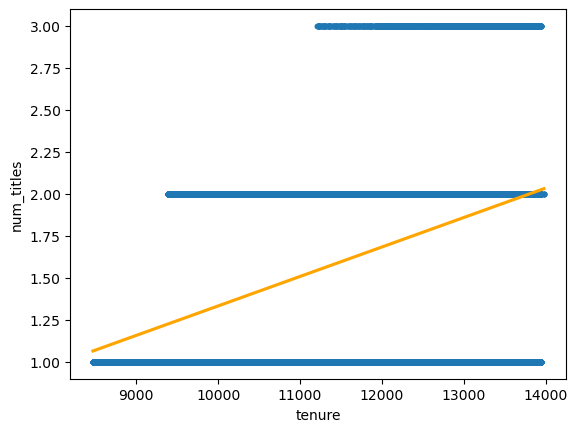

In [77]:
sns.regplot(x='tenure', y = 'num_titles', data=df, marker='.', line_kws={'color': 'orange'})
plt.show()

Because the number of titles is a **discrete** value, we should run an `ANOVA` or a kruskal Wallis test to test whether the average salary of those with 1 title is different from those with 2, or 2 different from 3, etc

<b>4: Test for Assumptions (distributions)</b>

Assumptions:
<br>
- do we have equal variance?
    <br>
- are there enough observations?
    <br>
- are they independent of each other?

In [78]:
#check for equal variance
stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [ ]:
# we can reject the idea that there are equal variances in these two groups

In [79]:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

The variances are significantly different; therefore we will use the Kruskal Wallis test.

<b>5: Run `stats` Tests</b>

#### New $H_0$ 
$H_0$ = The median is the same for the various number of titles
<br>
$H_\alpha$ = The median is not equal for the various number of titles

In [87]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

<b>6: Draw Conclusions</b>

<AxesSubplot:title={'center':'tenure'}, xlabel='num_titles'>

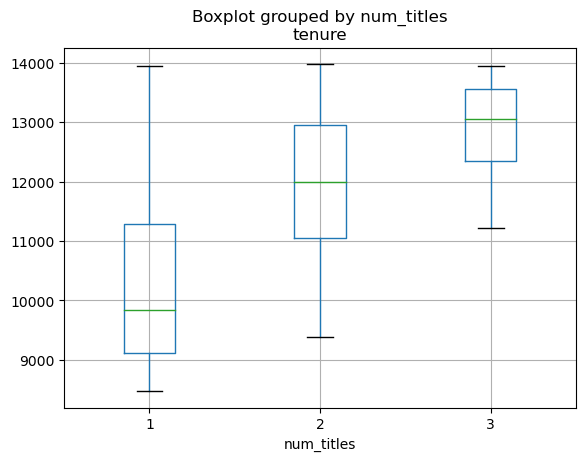

In [86]:
df.boxplot( 'tenure', by ='num_titles')

<b>Takeaway</b>: 
<br>
We reject $H_0$, the tenure median is not equal for the various number of titles.

# 4. Use the `sleepstudy` data.

In [143]:
from pydataset import data

In [144]:
df = data('sleepstudy')

In [145]:
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


## 4.1 Is there a relationship between days and reaction time?

<b>1: State Hypothesis & Set $\alpha$</b>
- $H_0$: There is no correlation between days and reaction time
- $H_a$: There is a correlation between days and reaction time

In [146]:
# set α
α = 0.05

<b>2: Select data and run `.info`</b>

In [147]:
react_df = df[['Reaction' ,'Days']]

In [148]:
react_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [149]:
react_df.head()

,Reaction,Days
1,249.5600,0
2,258.7047,1
3,250.8006,2
4,321.4398,3
5,356.8519,4


<b>3: Plot data</b>

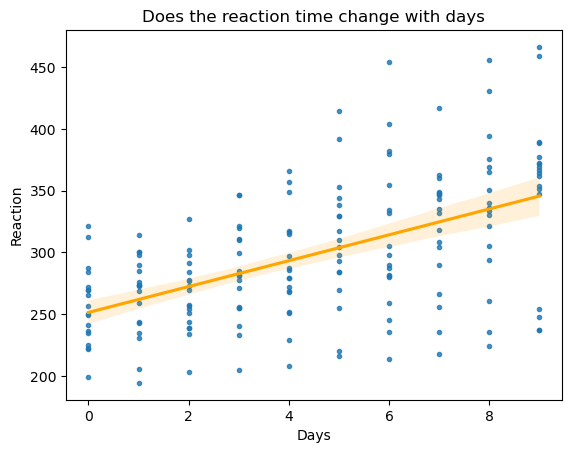

In [150]:
#plot relationships
sns.regplot(data=react_df, x='Days', y='Reaction', marker='.', line_kws=({'color': 'orange'}))

plt.title('Does the reaction time change with days')
plt.show()

<b>4: Test for Assumptions (distributions)</b>

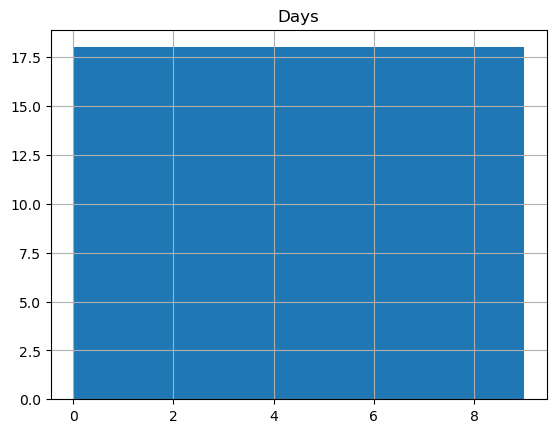

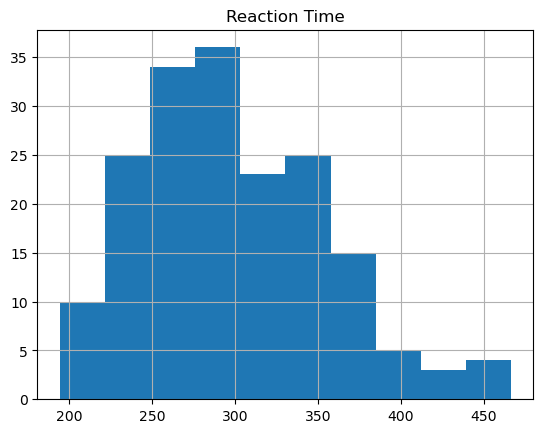

In [151]:
react_df.Days.hist()
plt.title('Days')
plt.show()

react_df.Reaction.hist()
plt.title('Reaction Time')
plt.show()

In [152]:
r,p = stats.shapiro(react_df.Days)
r,p

(0.9350039958953857, 3.023778560873325e-07)

In [153]:
eval_dist(r,p)

The data is NOT normally distributed


In [154]:
r,p = stats.shapiro(react_df.Reaction)
r,p

(0.970738410949707, 0.0007799151935614645)

In [155]:
eval_dist(r,p)

The data is NOT normally distributed


- Days is uniformly distributed 
- Reaction time is normally distributed

In [159]:
from scipy.stats import kstest

In [160]:
kstest(react_df.Days, 'norm')

KstestResult(statistic=0.7772498680518207, pvalue=2.612156654250204e-115)

In [161]:
kstest(react_df.Reaction, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

<b>5: Run `stats` Tests</b>

In [98]:
# Since both are not normally distributed, use Spearman
r,p = stats.spearmanr(react_df.Days, react_df.Reaction)
r,p

(0.5228138502259547, 5.132878057706873e-14)

<b>6: Draw Conclusions</b>

In [99]:
eval_Sresult(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.522814
P-value: 5.132878057706873e-14


<b>Takeaway</b>:
    <br>
    There is a moderate correlation between days and reaction time